In [4]:
import dionysus as d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#imports necessary packages to load and plot the data from the .fits file
#make sure you have astropy, numpy, and matplotlib packagesinstalled
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [16]:
#prints the information in the .fits file (not entirely sure what all entries mean)
#more can be found in https://lambda.gsfc.nasa.gov/common/fits_header.cfm?fitsfile=%2Fdata%2Fmap%2Fdr5%2Fskymaps%2F9yr%2Fraw%2Fwmap%5Fimap%5Fr9%5F9yr%5FK1%5Fv5%2Efits
#tmap.info()

tmap = fits.open('wmap_imap_r9_9yr_W3_v5.fits')
#apparently the first extension of this .fits file contains the image data 
#data = tmap[1].data



#prints a section of the data, seems like it is a list of tuples

print(data[0:5])

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]


#supposed to plot the image data when the data is in a 2D numpy array form
#plt.figure()
#plt.imshow(data, cmap='gray')
#plt.colorbar()


#seems that the "columns" are temperature and number of observations (counts)
#indicates that dataset is a counts vs temperature point cloud of the sky
#cols = tmap[1].columns
#cols.info()

Filename: wmap_imap_r9_9yr_W3_v5.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  Archive Map Table    1 BinTableHDU     21   3145728R x 2C   ['E', 'E']   
[(2.2998378, 3074.1948) (2.9589684, 3126.1853) (1.6670746, 3130.274 )
 (1.7374254, 3113.7168) (2.318041 , 3137.191 )]
[2.2998378, 2.9589684, 1.6670746, 1.7374254, 2.318041]


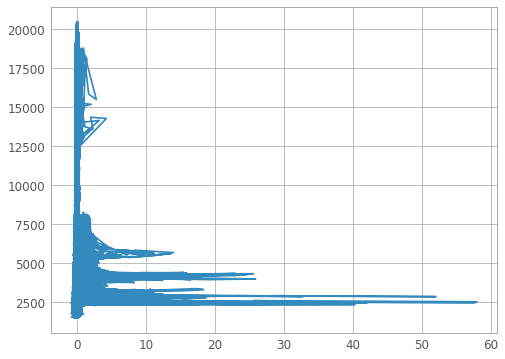

In [17]:
plt.plot(x_val, y_val) 